### **Import Libraries**

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns

# functions needed 
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# functions needed for imbalanced_cross_validation_score()
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold, ShuffleSplit

# sampler objects
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Classification models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

### **Import WESAD dataset from google drive**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
PATH = '/content/drive/My Drive/WESAD'

Mounted at /content/drive


In [ ]:
!pip install pickle5

In [ ]:
import pickle5 as pickle
file_name = "S2.pkl"
path_to_embed = os.path.join(PATH, file_name)
print(path_to_embed)
with open(path_to_embed, 'rb') as file:
    data = pickle.load(file, encoding='latin1')

/content/drive/My Drive/WESAD/S2.pkl


### Definging class labels

In [ ]:
Labels = ["Transient", "Baseline", "Stress", "Amusement", "Meditation"]

In [ ]:
c_ax=data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=data['label']

print("Done")

Done


#### Class Label Representation

 1. Multiclassification

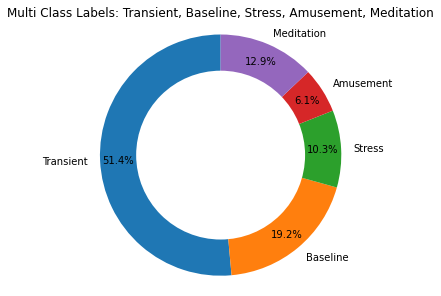

In [ ]:
transient = np.nonzero(data['label']==0)[0]
baseline = np.nonzero(data['label']==1)[0]
stress = np.nonzero(data['label']==2)[0]
amusement = np.nonzero(data['label']==3)[0]
meditation = np.nonzero(data['label']==4)[0]

class_labels = ['Transient','Baseline', 'Stress', 'Amusement', 'Meditation']
values = [len(transient),len(baseline),len(stress),len(amusement),len(meditation)]

  
# Creating plot
#fig = plt.figure(figsize =(6,6))
plt.pie(values, labels = class_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
# show plot
plt.axis('equal')  
plt.tight_layout()
plt.title("Multi Class Labels: Transient, Baseline, Stress, Amusement, Meditation")
plt.show()

In [ ]:
print("Transient : ", len(transient))
print("Baseline  : ", len(baseline))
print("Stress    : ", len(stress ))
print("Amusement : ", len(amusement))
print("Meditation: ", len(meditation))

Transient :  2142701
Baseline  :  800800
Stress    :  430500
Amusement :  253400
Meditation:  537599


2. Binary Classification

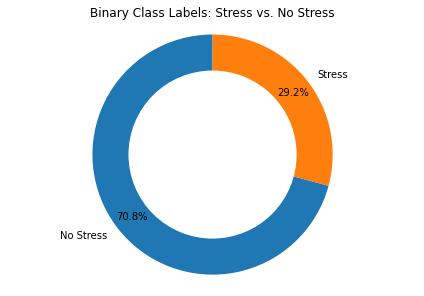

In [ ]:
baseline = np.nonzero(data['label']==1)[0]
stress = np.nonzero(data['label']==2)[0]
baseline = np.nonzero(data['label']==3)[0]
meditation = np.nonzero(data['label']==4)[0]
nostress = len(baseline) + len(meditation) + len(amusement)
class_labels = ['No Stress', 'Stress']
values = [nostress, len(stress)]
  
# Creating plot
#fig = plt.figure(figsize =(6,6))
plt.pie(values, labels = class_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
# show plot
plt.axis('equal')  
plt.tight_layout()
plt.title("Binary Class Labels: Stress vs. No Stress")
plt.show()


In [ ]:
print("Stress    : ", len(stress))
print("No stress : ", nostress)

Stress    :  430500
No stress :  1044399


3. Feature Distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


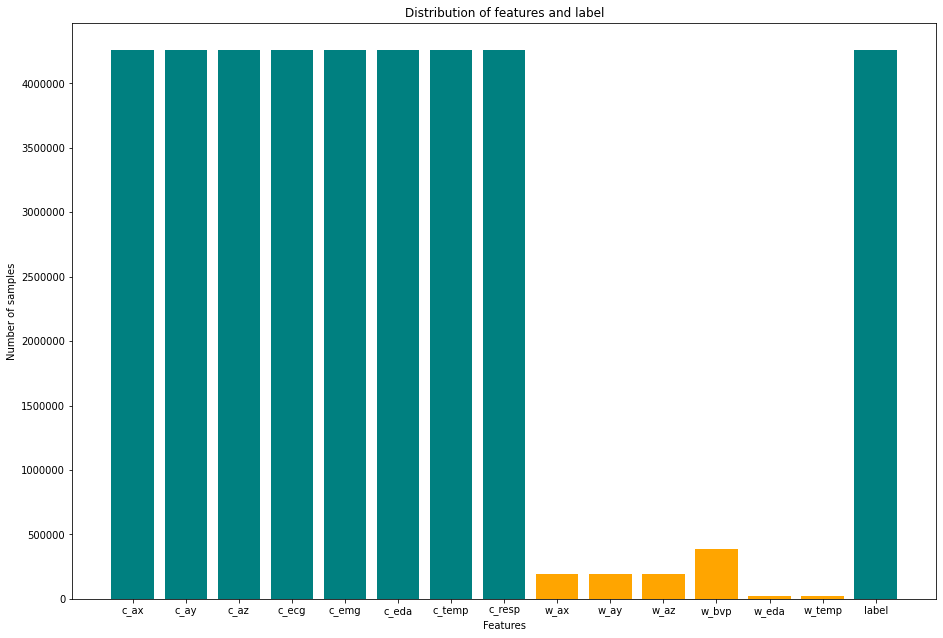

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
x = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","label"]
y = [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
plt.ticklabel_format(style='plain')
plt.bar(x,y, color=['teal', 'teal','teal','teal','teal','teal','teal','teal', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'teal'])


plt.tight_layout()
plt.title("Distribution of features and label")
plt.xlabel("Features")
plt.ylabel("Number of samples")
plt.show()

In [ ]:
print("c_ax   :",len(c_ax))
print("c_ay   :",len(c_ay))
print("c_az   :",len(c_az))
print("c_ecg  :",len(c_ecg))
print("c_emg  :",len(c_emg))
print("c_eda  :",len(c_eda))
print("c_temp :",len(c_temp))
print("c_resp :",len(c_resp))
print("w_ax   :",len(w_ax))
print("w_ay   :",len(w_ay))
print("w_az   :",len(w_az))
print("w_bvp  :",len(w_bvp))
print("w_eda  :",len(w_eda))
print("w_temp :",len(w_temp))
print("label  :", len(w_label))

c_ax   : 4255300
c_ay   : 4255300
c_az   : 4255300
c_ecg  : 4255300
c_emg  : 4255300
c_eda  : 4255300
c_temp : 4255300
c_resp : 4255300
w_ax   : 194528
w_ay   : 194528
w_az   : 194528
w_bvp  : 389056
w_eda  : 24316
w_temp : 24316
label  : 4255300


### **Convet pickle format to dataframe**

In [ ]:
dataframe=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
dataframe=dataframe.T
df = pd.DataFrame(data=dataframe, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 

print("Pickle converted to dataframe")

Pickle converted to dataframe


In [ ]:
df.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0


In [ ]:
df.isnull()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4255295,False,False,False,False,False,False,False,False,False
4255296,False,False,False,False,False,False,False,False,False
4255297,False,False,False,False,False,False,False,False,False
4255298,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4255300 entries, 0 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 292.2 MB


### **Data Visualizations**

In [ ]:
#sns.pairplot(df, hue="w_label", size=5)

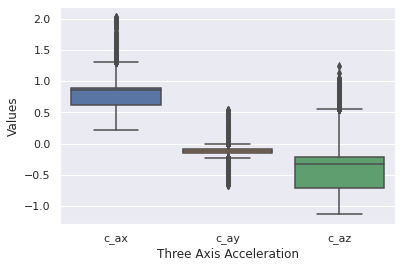

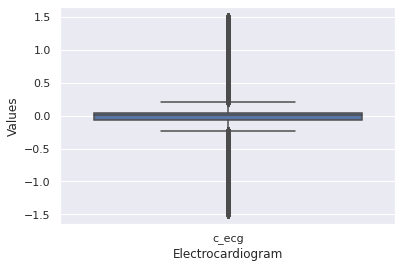

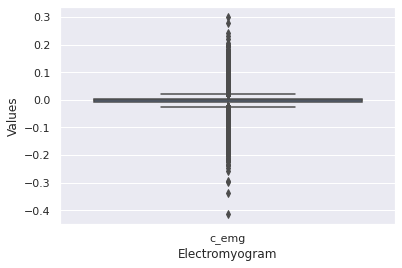

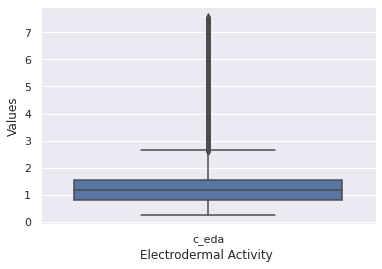

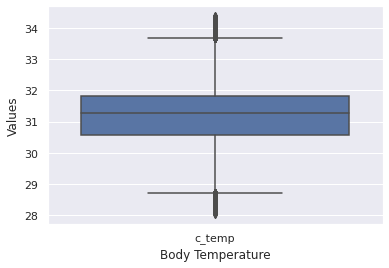

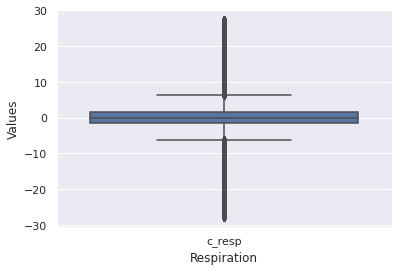

In [ ]:
sns.set(style="darkgrid")

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["c_ax", "c_ay", "c_az"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Three Axis Acceleration")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["c_ecg"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Electrocardiogram")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["c_emg"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Electromyogram")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["c_eda"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Electrodermal Activity ")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["c_temp"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Body Temperature")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["c_resp"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Respiration")
plt.show()

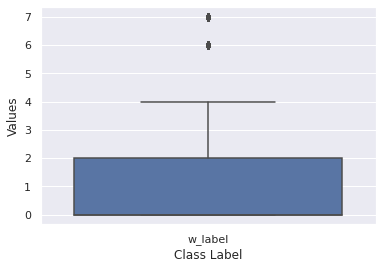

In [ ]:
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df), order=["w_label"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Class Label")
plt.show()

Outlier Removal

In [ ]:
print(df.shape)

(4255300, 9)


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2100456, 9)


In [ ]:
print(df_out.shape)

(2100456, 9)


**Box plot after removing outliers**

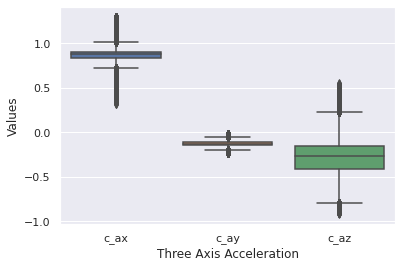

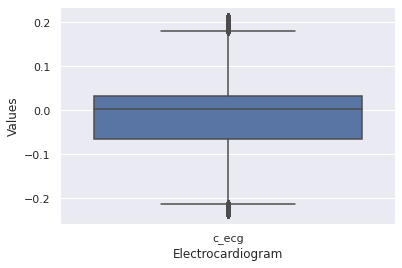

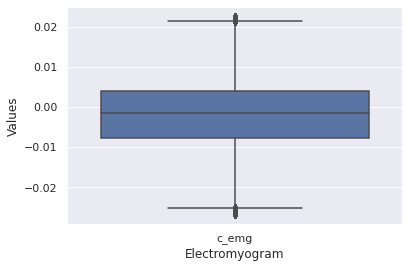

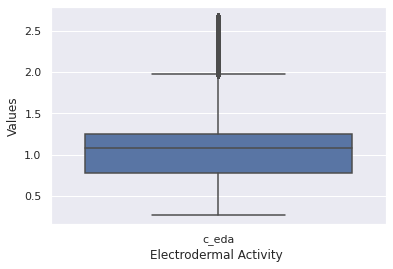

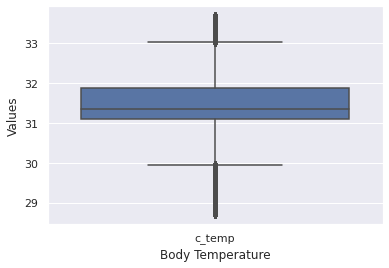

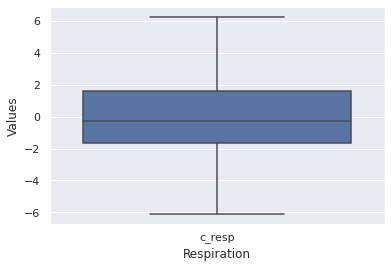

In [ ]:
sns.set(style="darkgrid")

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["c_ax", "c_ay", "c_az"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Three Axis Acceleration")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["c_ecg"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Electrocardiogram")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["c_emg"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Electromyogram")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["c_eda"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Electrodermal Activity ")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["c_temp"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Body Temperature")
plt.show()

boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df_out), order=["c_resp"])
boxplot.set_ylabel("Values")
boxplot.set_xlabel("Respiration")
plt.show()

**Histograms**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

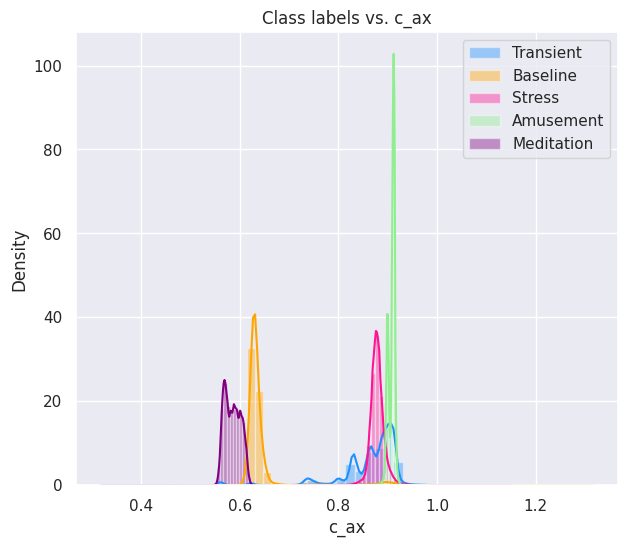

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_ax"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_ax"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_ax"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_ax"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_ax"] , color="purple", label="Meditation")

plt.title('Class labels vs. c_ax')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

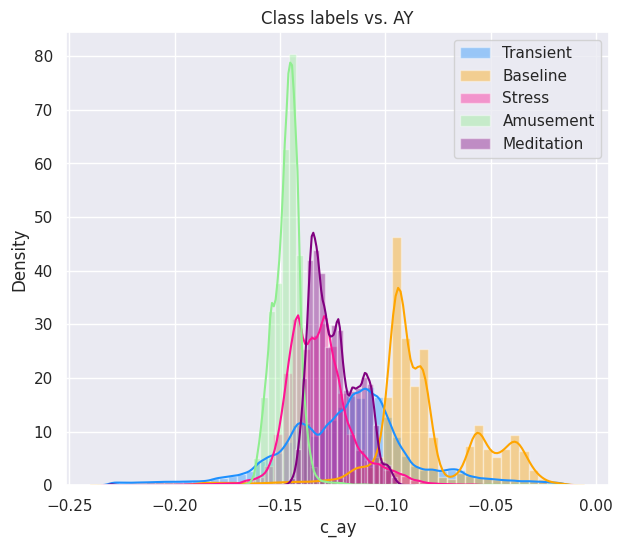

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_ay"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_ay"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_ay"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_ay"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_ay"] , color="purple", label="Meditation")
plt
plt.title('Class labels vs. AY')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

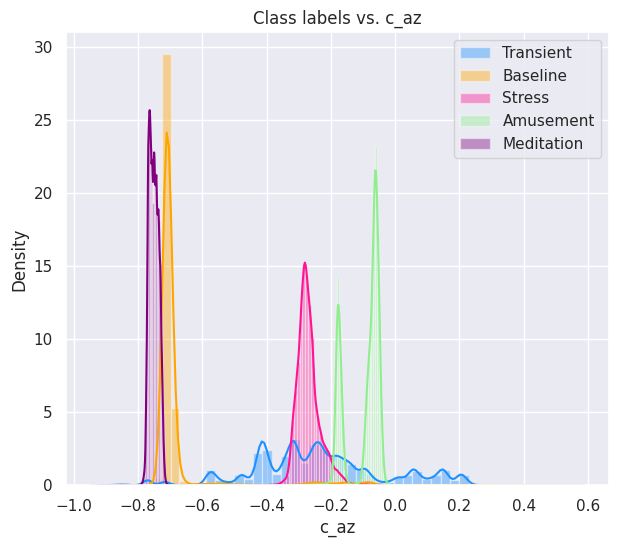

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_az"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_az"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_az"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_az"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_az"] , color="purple", label="Meditation")

plt.title('Class labels vs. c_az')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

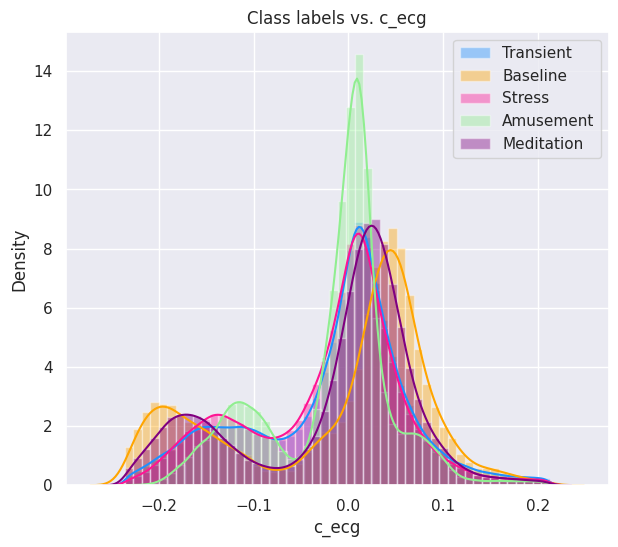

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_ecg"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_ecg"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_ecg"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_ecg"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_ecg"] , color="purple", label="Meditation")

plt.title('Class labels vs. c_ecg')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

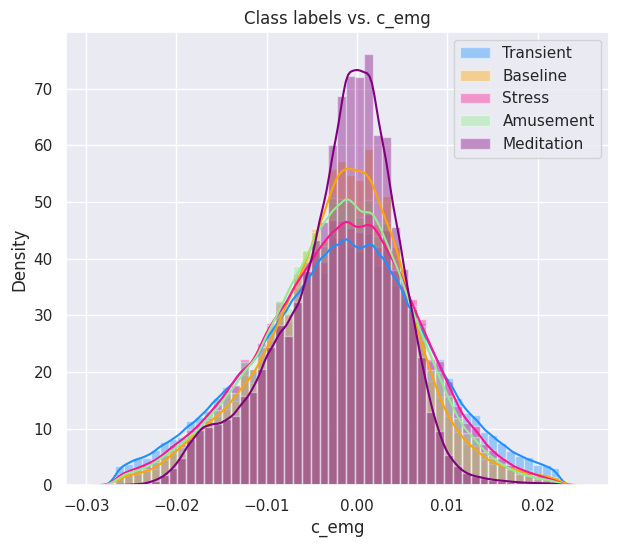

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_emg"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_emg"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_emg"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_emg"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_emg"] , color="purple", label="Meditation")

plt.title('Class labels vs. c_emg')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

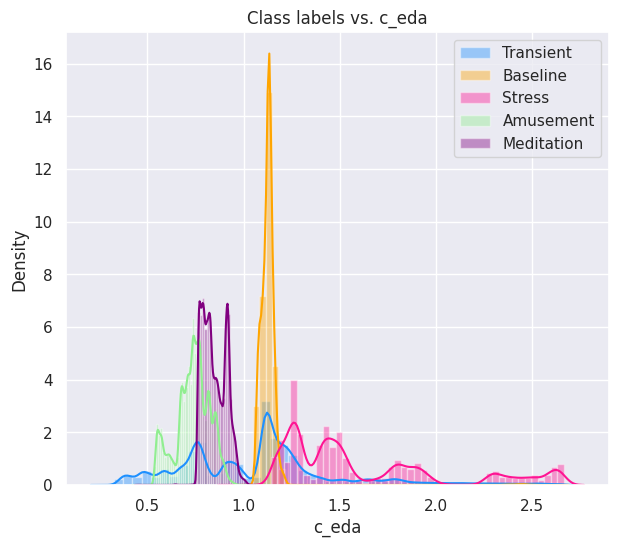

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_eda"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_eda"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_eda"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_eda"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_eda"] , color="purple", label="Meditation")

plt.title('Class labels vs. c_eda')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

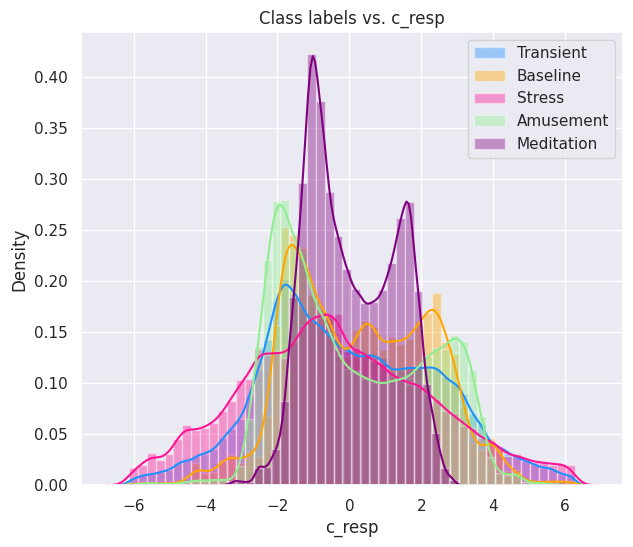

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_resp"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_resp"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_resp"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_resp"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_resp"] , color="purple", label="Meditation")

plt.title('Class labels vs. c_resp')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

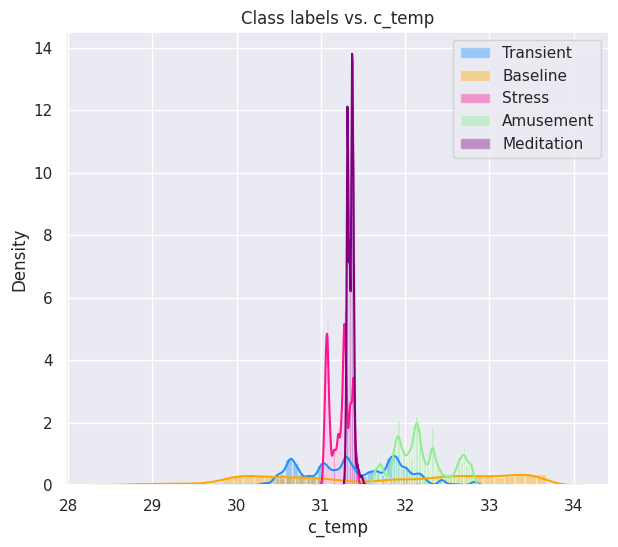

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df_out.loc[df_out.w_label== 0, "c_temp"] , color="dodgerblue", label="Transient")
sns.distplot( df_out.loc[df_out.w_label== 1, "c_temp"] , color="orange", label="Baseline")
sns.distplot( df_out.loc[df_out.w_label== 2 , "c_temp"] , color="deeppink", label="Stress")
sns.distplot( df_out.loc[df_out.w_label== 3 , "c_temp"] , color="lightgreen", label="Amusement")
sns.distplot( df_out.loc[df_out.w_label== 4 , "c_temp"] , color="purple", label="Meditation")


plt.title('Class labels vs. c_temp')
plt.legend()

**Correlation Matrix**

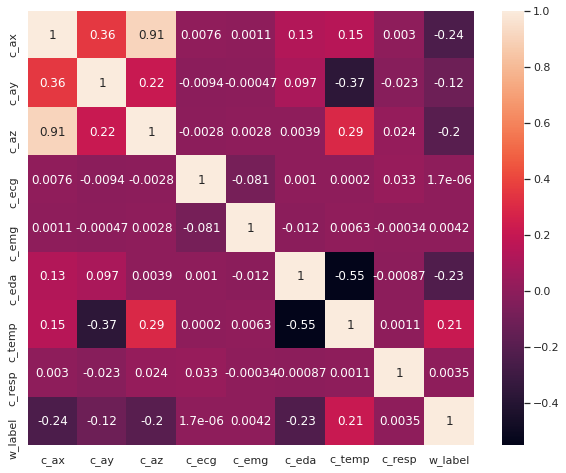

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

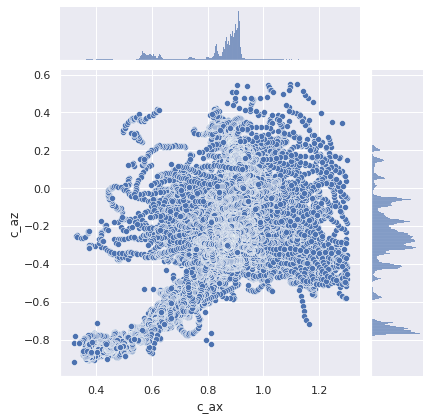

In [ ]:
sns.jointplot(x="c_ax", y="c_az", data=df_out, kind="scatter");

In [ ]:
A  = df_out.values
x  = A[:,:-1] #features    
y  = A[:,-1] #class label
print(x.shape)
print(y.shape)

(2100456, 8)
(2100456,)


In [ ]:
def make_binary(x):
  if x == 2: return 1
  else: return 2

df_binary = df_out
df_binary['w_label'] = df_out['w_label'].apply(make_binary)
df_binary['w_label'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2    1783521
1     316935
Name: w_label, dtype: int64

In [ ]:
A  = df_binary.values
x_binary  = A[:,:-1] #features    
y_binary  = A[:,-1] #class label
print(x.shape)
print(y.shape)

(2100456, 8)
(2100456,)


In [ ]:
df_binary.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,0.6430,-0.0600,-0.6966,-0.044998,-0.008011,2.652359,28.717804,-0.965881,2
394476,0.6408,-0.0638,-0.6892,-0.176926,-0.014557,2.648163,28.716339,1.914978,2
395154,0.6394,-0.0602,-0.6918,0.052231,0.009659,2.662659,28.719208,-1.673889,2
396635,0.6354,-0.0684,-0.6998,-0.138611,0.000000,2.662277,28.716339,2.491760,2
402178,0.6392,-0.0626,-0.6972,0.045822,-0.006775,2.648163,28.820953,2.105713,2


In [ ]:
df_ig = df_out.drop(['c_resp', 'c_emg', 'c_ecg'], axis = 1)
df_ig.head()

,c_ax,c_ay,c_az,c_eda,c_temp,w_label
393691,0.6430,-0.0600,-0.6966,2.652359,28.717804,1.0
394476,0.6408,-0.0638,-0.6892,2.648163,28.716339,1.0
395154,0.6394,-0.0602,-0.6918,2.662659,28.719208,1.0
396635,0.6354,-0.0684,-0.6998,2.662277,28.716339,1.0
402178,0.6392,-0.0626,-0.6972,2.648163,28.820953,1.0


In [ ]:
A  = df_ig.values
x_ig = A[:,:-1] #features    
y_ig  = A[:,-1] #class label


Cross Validation, Sampling and Machine Learning Algorithm

In [ ]:
def pr_auc_score(clf, x, y):
    '''
        This function computes area under the precision-recall curve. 
    '''
      
    precisions, recalls,_ = precision_recall_curve(y, clf.predict_proba(x)[:,1], pos_label=1)
    
    return auc(recalls, precisions)

In [ ]:
!pip install scikit-plot

In [ ]:

from sklearn import preprocessing
from collections import Counter
from time import gmtime, strftime
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score  
import scikitplot as skplt
 
from time import time
def CrossValidationSampling (clf, x, y, cv, sampler):
  avg_matrix=0
  cv_score = 0.
  train_score = 0.
  test_score = 0.
  avg_accuracy=0.
  avg_weighted_precision=0.
  avg_macro_precision=0.
  avg_weighted_recall=0.
  avg_macro_recall=0.
  avg_weighted_f1=0.
  avg_macro_f1=0.
  avg_kappa=0.
  t0=0.
  t1=0.
  
  skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=True)
  #lv = LeaveOneOut()
  #kf = KFold(n_splits=cv, random_state=0, shuffle=True)
  #shuffle = ShuffleSplit(n_splits=cv, test_size=0.2, random_state=42)
  #For every fold, we sample the data and apply model to it
  for train_idx, test_idx in skf.split(X=x, y=y):
    t0=time()
    xfold_train_sampled, yfold_train_sampled = sampler.fit_resample(x[train_idx],y[train_idx])
    clf.fit(xfold_train_sampled, yfold_train_sampled)
    print ("Training Time:", round(time()-t0, 3), "s")
    t1=time()
    predicted = clf.predict(x[test_idx])
    print ("Predict Time:", round(time()-t1, 3), "s")
    matrix = confusion_matrix(y[test_idx], predicted)
    #print(matrix)

    report = classification_report(y[test_idx], predicted)
    print(report)

    print('Confusion Matrix:')
    print(confusion_matrix(y[test_idx], predicted))
    print('Confusion Matrix:')
    cm = confusion_matrix(y[test_idx], predicted)

    cm_df = pd.DataFrame(cm,
                     index = Labels, 
                     columns = Labels)

    #plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
    #plt.grid(False) 
    plt.title("Confusion Matrix of Extra Trees classifier in Multiclass Classification")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y[test_idx], predicted)
    avg_accuracy += accuracy
    

    # precision tp / (tp + fp)
    precision = precision_score(y[test_idx], predicted, average='weighted')
    avg_weighted_precision += precision
    precision = precision_score(y[test_idx], predicted, average='macro')
    avg_macro_precision += precision
    

    # recall: tp / (tp + fn)
    recall = recall_score(y[test_idx], predicted, average='weighted')
    avg_weighted_recall += recall
    recall = recall_score(y[test_idx], predicted, average='macro')
    avg_macro_recall += recall
    

    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y[test_idx], predicted, average='weighted')
    avg_weighted_f1 += f1
    f1 = f1_score(y[test_idx], predicted, average='macro')
    avg_macro_f1 += f1

    # kappa
    kappa = cohen_kappa_score(y[test_idx], predicted)
    avg_kappa += kappa
    
    #AUPRC curve
    train_score = pr_auc_score(clf, xfold_train_sampled, yfold_train_sampled)
    test_score  = pr_auc_score(clf, x[test_idx], y[test_idx])
    print("Train AUPRC: %.2f Test AUPRC: %.2f"%(train_score,test_score))
    print()
    cv_score += test_score

  avg_accuracy = avg_accuracy/cv
  avg_weighted_precision = avg_weighted_precision/cv
  avg_macro_precision = avg_macro_precision/cv
  avg_weighted_recall = avg_weighted_recall/cv
  avg_macro_recall = avg_macro_recall/cv
  avg_weighted_f1 = avg_weighted_f1/cv
  avg_macro_f1 = avg_macro_f1/cv
  avg_kappa = avg_kappa/cv
  cv_score = cv_score/cv

  print()
  print('Average Accuracy: %f' % avg_accuracy)
  print('Average Weighted Precision: %f' % avg_weighted_precision)
  print('Average Macro Precision: %f' % avg_macro_precision)
  print('Average Weighted recall: %f' % avg_weighted_recall)
  print('Average Macro recall: %f' % avg_macro_recall)
  print('Average Weighted f1: %f' % avg_weighted_f1)
  print('Average Macro f1: %f' % avg_macro_f1)
  print('Cohens kappa: %f' % avg_kappa)
  print('Average AUPRC: %f' % cv_score)
 
  print('Original dataset shape {}'.format(Counter(y)))
  print('Cross Validation dataset shape {}'.format(Counter(y[train_idx]))) #cross validation
  print('Resampled dataset shape {}'.format(Counter(yfold_train_sampled)))  #sampling

 # fpr, tpr, _ = roc_curve(y[test_idx], clf.predict_proba(x[test_idx])[:,1], pos_label=1)
  #roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc :estimator_name : str).plot()

  roc = roc_auc_score(y[test_idx], clf.predict_proba(x[test_idx])[:,1], multi_class='ovr')
  print(roc)
  # roc curve for classes
      

  precisions, recalls,_ = precision_recall_curve(y[test_idx], clf.predict_proba(x[test_idx])[:,1], pos_label=1)

  plt.step(recalls, precisions, color='b', alpha=0.2,
          where='post')
  plt.fill_between(recalls, precisions, step='post', alpha=0.2,
                  color='b')

  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision-Recall curve')





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Time: 12.359 s
Predict Time: 5.824 s
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    246087
         1.0       1.00      1.00      1.00     10732
         2.0       0.96      1.00      0.98     63387
         3.0       0.96      1.00      0.98     47839
         4.0       0.95      1.00      0.98     52047

    accuracy                           0.98    420092
   macro avg       0.98      0.99      0.98    420092
weighted avg       0.98      0.98      0.98    420092

Confusion Matrix:
[[239124      8   2334   1984   2637]
 [     0  10732      0      0      0]
 [    13      0  63374      0      0]
 [     9      0      0  47830      0]
 [    18      0      0      0  52029]]
Confusion Matrix:


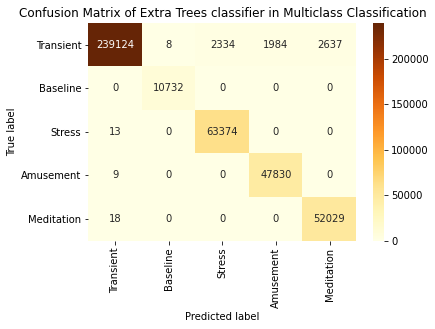

Train AUPRC: 1.00 Test AUPRC: 1.00



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Time: 12.378 s
Predict Time: 6.112 s
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    246087
         1.0       1.00      1.00      1.00     10732
         2.0       0.96      1.00      0.98     63387
         3.0       0.96      1.00      0.98     47838
         4.0       0.95      1.00      0.97     52047

    accuracy                           0.98    420091
   macro avg       0.97      0.99      0.98    420091
weighted avg       0.98      0.98      0.98    420091

Confusion Matrix:
[[238844      3   2456   1995   2789]
 [     0  10732      0      0      0]
 [    16      0  63371      0      0]
 [    12      0      0  47826      0]
 [    13      0      0      0  52034]]
Confusion Matrix:


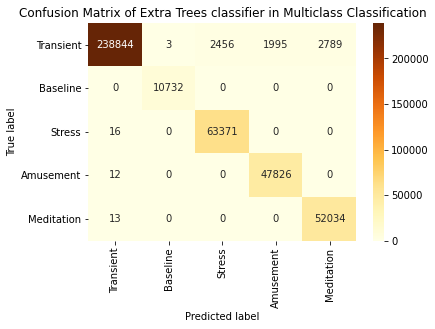

Train AUPRC: 1.00 Test AUPRC: 1.00



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Time: 12.286 s
Predict Time: 6.082 s
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    246086
         1.0       1.00      1.00      1.00     10732
         2.0       0.96      1.00      0.98     63387
         3.0       0.96      1.00      0.98     47838
         4.0       0.95      1.00      0.97     52048

    accuracy                           0.98    420091
   macro avg       0.97      0.99      0.98    420091
weighted avg       0.98      0.98      0.98    420091

Confusion Matrix:
[[238827      2   2406   2031   2820]
 [     0  10732      0      0      0]
 [    11      0  63376      0      0]
 [     8      0      0  47830      0]
 [    17      0      0      0  52031]]
Confusion Matrix:


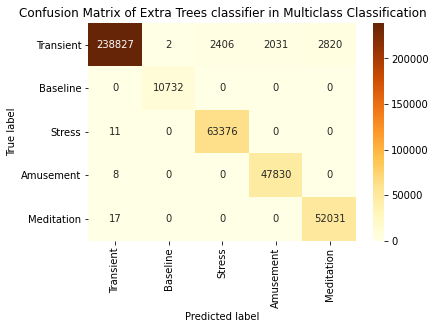

Train AUPRC: 1.00 Test AUPRC: 1.00



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Time: 12.326 s
Predict Time: 6.185 s
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    246086
         1.0       1.00      1.00      1.00     10732
         2.0       0.96      1.00      0.98     63387
         3.0       0.96      1.00      0.98     47838
         4.0       0.95      1.00      0.97     52048

    accuracy                           0.98    420091
   macro avg       0.97      0.99      0.98    420091
weighted avg       0.98      0.98      0.98    420091

Confusion Matrix:
[[238932      5   2482   1935   2732]
 [     0  10732      0      0      0]
 [    20      0  63367      0      0]
 [    10      0      0  47828      0]
 [    13      0      0      0  52035]]
Confusion Matrix:


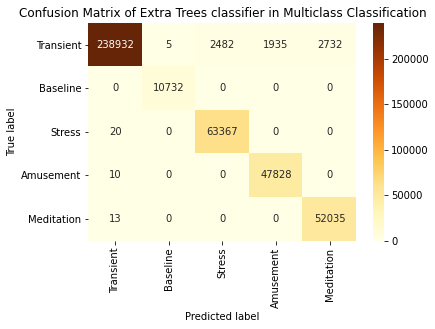

Train AUPRC: 1.00 Test AUPRC: 1.00



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training Time: 12.257 s
Predict Time: 6.065 s
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    246087
         1.0       1.00      1.00      1.00     10731
         2.0       0.96      1.00      0.98     63387
         3.0       0.96      1.00      0.98     47838
         4.0       0.95      1.00      0.97     52048

    accuracy                           0.98    420091
   macro avg       0.97      0.99      0.98    420091
weighted avg       0.98      0.98      0.98    420091

Confusion Matrix:
[[238901      2   2441   2019   2724]
 [     0  10731      0      0      0]
 [    16      0  63371      0      0]
 [    12      0      0  47826      0]
 [    19      0      0      0  52029]]
Confusion Matrix:


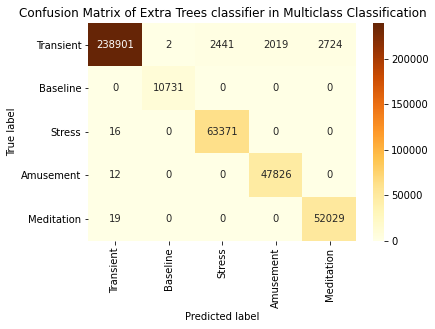

Train AUPRC: 1.00 Test AUPRC: 1.00


Average Accuracy: 0.982855
Average Weighted Precision: 0.983577
Average Macro Precision: 0.974517
Average Weighted recall: 0.982855
Average Macro recall: 0.994028
Average Weighted f1: 0.982916
Average Macro f1: 0.983954
Cohens kappa: 0.972024
Average AUPRC: 1.000000
Original dataset shape Counter({0.0: 1230433, 2.0: 316935, 4.0: 260238, 3.0: 239191, 1.0: 53659})
Cross Validation dataset shape Counter({0.0: 984346, 2.0: 253548, 4.0: 208190, 3.0: 191353, 1.0: 42928})
Resampled dataset shape Counter({0.0: 42928, 1.0: 42928, 2.0: 42928, 3.0: 42928, 4.0: 42928})


AxisError: ignored

In [ ]:
cv=5
clf = ExtraTreesClassifier()
sampler = RandomUnderSampler()
CrossValidationSampling (clf, x, y, cv, sampler)

In [ ]:
data = [[1220433.,  53659.,  316935. ,239191. , 260238.  ],
  [984625., 42994., 253254., 191286., 208205. ],
  [42994., 42994., 42994., 42994., 42994.],
  [984625., 984625., 984625., 984625., 984625.]]

X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
plt.bar(X + 0.00, data[0], color = 'b', width = 0.20, label = "Original dataset")
plt.bar(X + 0.20, data[1], color = 'g', width = 0.20, label = "Cross Validated dataset")
plt.bar(X + 0.40, data[2], color = 'r', width = 0.20, label = "Under Sampled dataset")
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.20, label = "Over Sampled dataset")
plt.ticklabel_format(style='plain')

plt.xticks(X, Labels)
plt.title("Distribution of original, cross validated, under sampled and data")
plt.ylabel("No. of samples")
plt.xlabel("Class labels")
plt.legend()
plt.show()

In [ ]:
data = [[316935.,  1783521.],
  [253697., 1426667. ],
  [ 253697., 253697.],
  [ 1426667., 1426667.]]

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
plt.bar(X + 0.00, data[0], color = 'b', width = 0.20, label = "Original dataset")
plt.bar(X + 0.20, data[1], color = 'g', width = 0.20, label = "Cross Validated dataset")
plt.bar(X + 0.40, data[2], color = 'r', width = 0.20, label = "Under Sampled dataset")
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.20, label = "Over Sampled dataset")
plt.ticklabel_format(style='plain')

plt.xticks(X, ["Stress", "No stress"])
plt.title("Distribution of original, cross validated, under sampled and over data")
plt.ylabel("No. of samples")
plt.xlabel("Class labels")
plt.legend()
plt.show()

MLPCLassifier



--- Class balance ---
(array([0, 1, 2, 3, 4]), array([984346,  42927, 253548, 191353, 208190]))
(array([0, 1, 2, 3, 4]), array([246087,  10732,  63387,  47838,  52048]))

-- Training data --
Accuracy: 95.69
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    984346
           1       0.99      0.95      0.97     42927
           2       0.92      0.96      0.94    253548
           3       0.95      0.91      0.93    191353
           4       0.95      0.99      0.97    208190

    accuracy                           0.96   1680364
   macro avg       0.96      0.95      0.95   1680364
weighted avg       0.96      0.96      0.96   1680364

Confusion Matrix:
[[943481    305  20617   9721  10222]
 [  2075  40762     89      0      1]
 [  9840      0 243708      0      0]
 [ 17758      0      0 173595      0]
 [  1680     46      0      0 206464]]


---- Test data ----
Accuracy: 95.73
Classification Report:
          

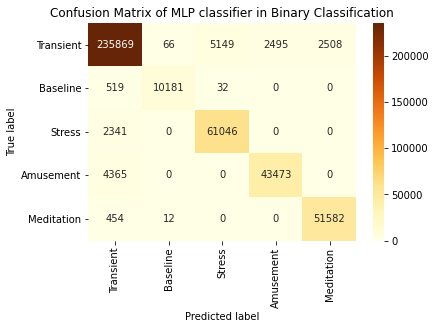

In [ ]:
# Import libraries
import pandas
import joblib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
# Train and evaluate
def train_and_evaluate(X_train, Y_train, X_test, Y_test):
    
    # Create a model
    model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(15, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=15)
    # Train the model on the whole data set
    model.fit(X_train, Y_train)
    # Save the model (Make sure that the folder exists)
    joblib.dump(model, 'models\\mlp_classifier.jbl')
    # Evaluate on training data
    print('\n-- Training data --')
    predictions = model.predict(X_train)
    accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_train, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_train, predictions))
    print('')
    # Evaluate on test data
    print('\n---- Test data ----')
    predictions = model.predict(X_test)
    accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
    print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
    print('Classification Report:')
    print(sklearn.metrics.classification_report(Y_test, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(Y_test, predictions))
    cm = confusion_matrix(Y_test, predictions)
    cm_df = pd.DataFrame(cm,
                     index = Labels, 
                     columns = Labels)

    #plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, cmap="YlOrBr", fmt='g')
    #plt.grid(False) 
    plt.title("Confusion Matrix of MLP classifier in Binary Classification")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    
# Plot the classifier
def plot_classifier(X, Y):
    
    # Load the model
    model = joblib.load('models\\mlp_classifier.jbl')
    # Calculate
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot diagram
    fig = plt.figure(figsize = (12, 8))
    plt.contourf(xx, yy, Z, cmap='ocean', alpha=0.25)
    plt.contour(xx, yy, Z, colors='w', linewidths=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap='Spectral')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.savefig('plots\\mlp_classifier.png')
# The main entry point for this module
def main():
    # Load data set (includes header values)
    dataset = df_out
    # Slice data set in data and labels (2D-array)
    X = dataset.values[:,:-1] # Data
    Y = dataset.values[:,-1].astype(int) # Labels
    # Split data set in train and test (use random state to get the same split every time, and stratify to keep balance)
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=5, stratify=Y)
    # Make sure that data still is balanced
    print('\n--- Class balance ---')
    print(np.unique(Y_train, return_counts=True))
    print(np.unique(Y_test, return_counts=True))
    # Train and evaluate
    train_and_evaluate(X_train, Y_train, X_test, Y_test)
    # Plot classifier
    #plot_classifier(X, Y)
# Tell python to run main method
if __name__ == "__main__": main()